## 0 读取数据

我选择的是 `college` 这个数据集。该数据集包含摘自《美国新闻与世界报道》1995年刊的美国高校统计数据: 

| 数据域名称 | 含义 |
|-----|-----|
| `Private` | 二分变量，以"No"和"Yes"标识私立或公立大学   |
| `Apps` | 收到的申请数量   |
| `Accept` | 录取的申请数量   |
| `Enroll` | 入学新生数量   |
| `Top10perc` | 高中排名前10%的新生百分比   |
| `Top25perc` | 高中排名前25%的新生百分比   |
| `F.Undergrad` | 全日制本科学生人数   |
| `P.Undergrad` | 非全日制本科学生人数   |
| `Outstate` | 外州学生学费   |
| `Room.Board` | 食宿费用   |
| `Books` | 预估书本费用   |
| `Personal` | 预估个人开销   |
| `PhD` | 拥有博士学位的教师比例   |
| `Terminal` | 拥有最高学位的教师比例   |
| `S.F.Ratio` | 师生比例   |
| `perc.alumni` | 捐赠校友比例   |
| `Expend` | 生均教学支出   |
| `Grad.Rate` | 毕业率 |

我们希望了解其他特征域的值对毕业率的影响。

In [1]:
import pandas as pd # type: ignoreselect
college = pd.read_csv('college.csv')

In [2]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


将第一列的列明改为 `College`

In [3]:
college.rename({'Unnamed: 0': 'College'}, axis=1, inplace=True)
college.set_index('College', inplace=True)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


将 `Private` 字段映射为 `bool` 值变量

In [4]:
college['Private'] = college['Private'].map({'Yes': True, 'No': False})
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,True,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,True,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,True,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,True,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,True,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


使用 `DataFrame.describe()` 函数获取每个特征域的各统计量

In [5]:
college.describe(include= "all")

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,NaN,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,NaN,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,NaN,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,NaN,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,NaN,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000


## 1 探索性数据分析

下面对上述 `describe()` 的结果进行分析。

整体概述

这份数据描述了777所美国大学在1995年的各项指标。数据包含分类变量（如Private）和数值变量。describe()函数为数值变量提供了丰富的统计信息，让我们能够快速了解数据的中心趋势、离散程度和分布形态。

分变量详细分析

1. 学校基本属性

* Private
    * 分析： 这是一个分类变量，describe() 显示其唯一值（unique）为2（Yes/No），其中 top 值为 True（即"Yes"），频数（freq）为565。
    * 结论： 数据集中私立大学占绝大多数。565所私立大学 / 777所总数 ≈ 72.7% 的学校是私立的。

2. 招生情况

* Apps（申请数）， Accept（录取数）， Enroll（入学数）

    * 平均数： 平均每所大学收到3001份申请，录取2018人，最终有779人入学。

    * 统计行为：
        * 差异巨大： 三个变量的标准差（std）都非常大，几乎接近甚至超过其平均值（例如Apps的std=3870 > mean=3001）。这表明不同大学的招生规模存在天壤之别。最大值（Apps max=48,094）和最小值（Apps min=81）也印证了这一点。

        * 录取与入学率： 我们可以粗略计算：

            * 平均录取率 = Accept / Apps ≈ 2018 / 3001 ≈ 67.3%

            * 平均入学率/报到率 = Enroll / Accept ≈ 779 / 2018 ≈ 38.6%

        * 分布形态： 中位数（50%）远小于平均数（均值）。例如，Apps的中位数是1558，但均值是3001。这意味着有少量大学拥有极其庞大的申请量（极右偏分布），拉高了整体平均值。大部分大学的申请数集中在较低水平（一半的大学申请数少于1558）。

3. 生源质量

* Top10perc（高中前10%）， Top25perc（高中前25%）

    * 平均数： 平均而言，新生中有27.6%来自高中排名前10%的学生，55.8%来自前25%的学生。

    * 统计行为： 分布相对均匀（标准差小于均值），Top25perc的中位数（54%）和均值（55.8%）很接近，说明分布相对对称。而Top10perc的中位数（23%）低于均值（27.6%），表明存在一些顶尖生源高度集中的大学，使分布轻微右偏。

4. 学生与教师规模

* F.Undergrad（全日制本科）， P.Undergrad（非全日制本科）

    * 平均数： 平均全日制本科生为3699人，非全日制为855人。

    * 统计行为： 同样呈现出极大的差异（标准差很大）。全日制学生的规模分布极右偏（中位数1707 << 均值3699），说明少数大型大学主导了数据。非全日制学生的最大值（21,836）和标准差（1522）表明，不同大学在教学模式上差异显著。

* S.F.Ratio（师生比）

    * 平均数： 平均师生比为14.09（即平均每14名学生对应1名教师）。

    * 统计行为： 分布相对集中（标准差3.96），中位数（13.6）和均值（14.09）接近，大部分学校的师生比在11.5到16.5之间（25%-75%分位数）。

5. 费用与开支

* Outstate（外州学费）， Room.Board（食宿费）， Books（书本费）， Personal（个人开销）， Expend（生均支出）

    * 平均数： 外州学费平均为10,441，食宿费为4,358，书本费为549，个人开销为1,341，生均教学支出为$9,660。

    * 统计行为：

        * 学费和支出差异显著： Outstate和Expend的标准差非常大，表明大学的收费水平和资源投入相差悬殊。Expend的最大值（56,233）是均值（9,660）的5倍多，再次印证了资源的高度不平等。

        * 固定费用相对稳定： Room.Board和Books的分布相对集中，说明这些基础生活成本在不同大学间差异较小。

        * 分布形态： Outstate和Expend的分布明显右偏（中位数 < 均值），说明有一小部分高学费、高支出的精英大学。

6. 师资力量

* PhD（拥有博士学位教师比例）， Terminal（拥有终极学位教师比例）

    * 平均数： 平均72.7%的教师拥有博士学位，79.7%拥有终极学位（通常指本领域的最高学位，如博士、艺术硕士MFA等）。

    * 统计行为： 分布较为集中，大部分大学的教师博士学位比例在62%到85%之间（25%-75%分位数），师资队伍整体素质较高且在不同大学间相对均衡。Terminal的比例普遍高于PhD，这是合理的。

7. 学校成果与声誉

* perc.alumni（捐赠校友比例）

    * 平均数： 平均22.7%的校友会捐款。

    * 统计行为： 分布较为分散，不同大学的校友捐赠文化和忠诚度差异很大。

* Grad.Rate（毕业率）

    * 平均数： 平均毕业率为65.5%。

    * 统计行为：

        * 异常值： 最大值118%是一个明显的异常值，因为毕业率不可能超过100%。这可能是数据录入错误，或者计算方法特殊（例如包含了超期毕业的学生），需要进一步核查。

        * 分布： 剔除异常值影响，毕业率的分布相对正常，中位数（65%）与均值（65.5%）基本一致，表明分布大致对称。但毕业率本身在不同大学间差异不小（标准差17.2%）。

总结

1.  数据构成： 数据集以私立大学为主（72.7%）。
2.  极度不均衡： 大学在规模（申请数、学生人数）和资源（学费、支出）上表现出极端的差异，存在明显的“头部效应”。大部分统计量的平均值都被少数大型/富裕的大学拉高，中位数通常能更好地代表“典型”大学的情况。
3.  招生漏斗： 从申请到录取再到入学，数量大幅减少，平均入学率仅为38.6%。
4.  潜在数据问题： Grad.Rate存在超过100%的异常值，需要在后续分析中处理。
5.  相对稳定的指标： 师生比（S.F.Ratio）、师资博士比例（PhD, Terminal）、基础生活成本（Room.Board, Books）等指标在不同大学间的分布相对集中。

(d) Use the `pd.plotting.scatter_matrix()` function to produce a
scatterplot matrix of the frst columns `[Top10perc, Apps, Enroll]`.
Recall that you can reference a list `C` of columns of a data frame
`A` using `A[C]`.

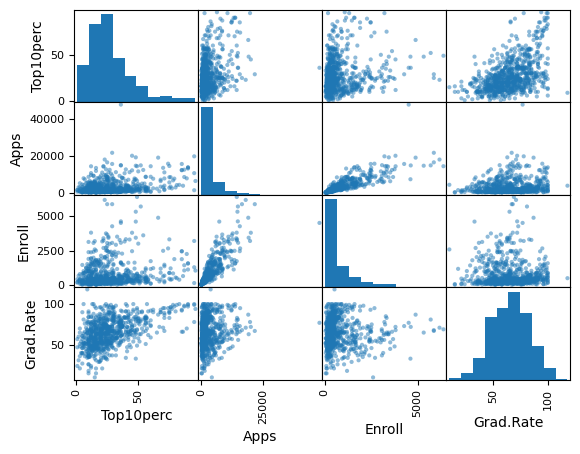

: 

In [ ]:
pd.plotting.scatter_matrix(college[[
    "Top10perc", 
    "Apps", 
    "Enroll",
    "Grad.Rate"
]]);

(e) Use the `boxplot()` method of `college` to produce side-by-side
boxplots of `Outstate` versus `Private`.

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

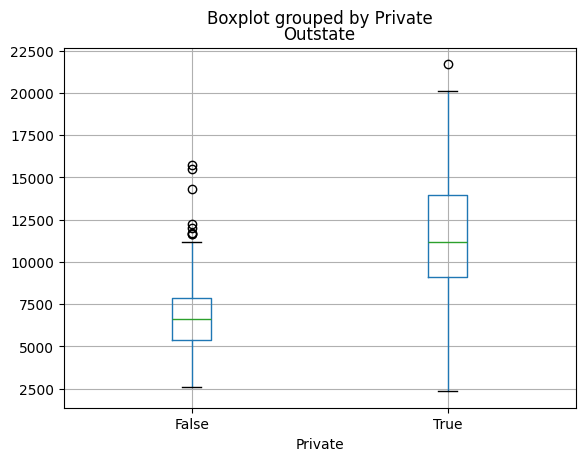

In [7]:
college.boxplot(column='Outstate', by='Private')

(f) Create a new qualitative variable, called `Elite`, by *binning* the
`Top10perc` variable into two groups based on whether or not the
proportion of students coming from the top $10\%$ of their high
school classes exceeds $50\%$.

```python
college['Elite'] = pd.cut(college['Top10perc'],
                          [0,50,100],
                          labels=['No', 'Yes'])
```

Use the `value_counts()` method of `college['Elite']` to see how
many elite universities there are. Finally, use the `boxplot()` method
again to produce side-by-side boxplots of `Outstate` versus `Elite`.

Elite
No     699
Yes     78
Name: count, dtype: int64


<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

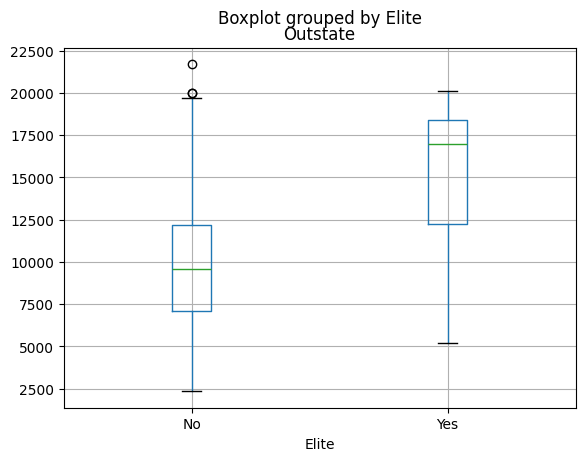

In [8]:
college['Elite'] = pd.cut(college['Top10perc'],
                          [0,50,100],
                          labels=['No', 'Yes'])
print(college['Elite'].value_counts())
college.boxplot(column='Outstate', by='Elite')

(g) Use the `plot.hist()` method of `college` to produce some histograms with difering numbers of bins for a few of the quantitative variables. The command `plt.subplots(2, 2)` may be useful: it will divide the plot window into four regions so that four
plots can be made simultaneously. By changing the arguments
you can divide the screen up in other combinations.

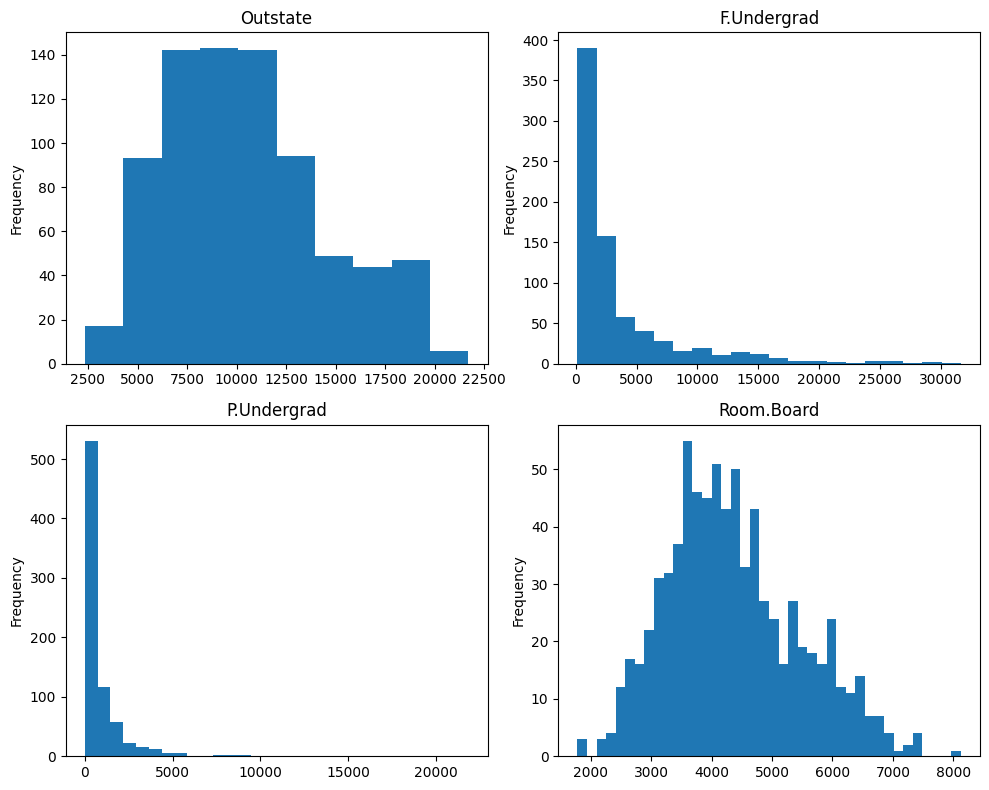

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# generate histplots
college['Outstate'].plot.hist(ax=axs[0, 0], bins=10, title='Outstate')
college['F.Undergrad'].plot.hist(ax=axs[0, 1], bins=20, title='F.Undergrad')
college['P.Undergrad'].plot.hist(ax=axs[1, 0], bins=30, title='P.Undergrad')
college['Room.Board'].plot.hist(ax=axs[1, 1], bins=40, title='Room.Board')

plt.tight_layout()
plt.show()

(h) Continue exploring the data, and provide a brief summary of
what you discover.

In [10]:
import seaborn as sns

college["Private"] = college["Private"].map({'Yes': 1, 'No': 0})
college["Elite"] = college["Elite"].map({'Yes': 1, 'No': 0})
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
College,,,,,,,,,,,,,,,,,,,
Abilene Christian University,NaN,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,NaN,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,NaN,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,NaN,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,NaN,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,NaN,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
Xavier University,NaN,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,0
Xavier University of Louisiana,NaN,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,0
